## Analysis of Trip Advisor Hotel Popularity

### Description of the dataset

The dataset is a list of 4,599 hotels and their bubble ratings on Trip Advisor. The collection of hotels in the dataset is from Rome.


Some of the most notable features collected are ,hotel_url, name, views, bubble_rating and multiple hotel categories and different amenities. The most interesting features of this dataset is bubble_rating.


Bubble_rating on Trip Advisor works similar to a star rating system. The higher the rating, the more popular a hotel might be.


Categories of the data set
Tourism, Demand Estimation, Polynomial Regression, Causal Inference

### Purpose of the analysis

The portfolio is to analyse and predict different hotel's bubble ratings from other available features. It is aimed to explore the relation of public's viewing on a hotel's Trip Advisor's page, the adjusted score, on Hotel's rating. 

To achieve this, several regression techniques are used to yield the best regression model. 


### Import Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

# from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#Read data and encode
ds1 = 'Portfolio4/TripAdvisor_Hotel_Popularity.csv'
df1 = pd.read_csv(ds1,encoding='ISO-8859-1')
df1

,Unnamed: 0,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,0,1.733333,1.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4595,4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,0,1.888889,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4596,4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,0,2.090909,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4597,4598,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,0,2.000000,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 1. Explore the data

In [2]:
df1.shape

(4599, 272)

In [3]:
df1.head()

,Unnamed: 0,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Univaraiate analysis
df1.describe()

,Unnamed: 0,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,...,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2300.000000,0.274625,0.037399,4.058395,4.067841,0.190041,0.619482,0.190476,0.111763,0.295934,...,0.025440,0.020874,0.000435,0.000870,0.000217,0.002609,0.004784,0.648619,0.072624,0.001522
std,1327.761274,2.231304,0.189759,0.837018,0.850739,0.392376,0.485567,0.392719,0.315109,0.456511,...,0.157475,0.142978,0.020851,0.029482,0.014746,0.051020,0.069006,0.477454,0.259547,0.038988
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1150.500000,0.000000,0.000000,3.673771,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2300.000000,0.000000,0.000000,4.282051,4.500000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3449.500000,0.000000,0.000000,4.666667,4.500000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4599.000000,88.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Variable Identification
df1.dtypes

Unnamed: 0                      int64
hotel_url                      object
name                           object
views                           int64
views_binary                    int64
                                ...  
amenities_Waxing services       int64
amenities_Whirlpool bathtub     int64
amenities_Wifi                  int64
amenities_Wine / champagne      int64
amenities_Yoga classes          int64
Length: 272, dtype: object

<Axes: xlabel='bubble_rating', ylabel='Count'>

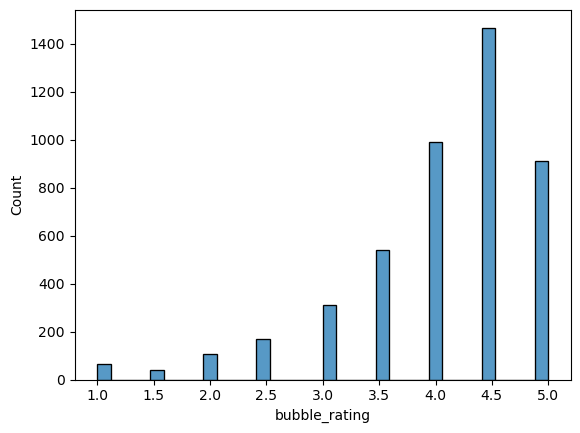

In [6]:
#Histplot of bubble_rating
sns.histplot(data=df1, x='bubble_rating')

<Axes: xlabel='bubble_rating', ylabel='Count'>

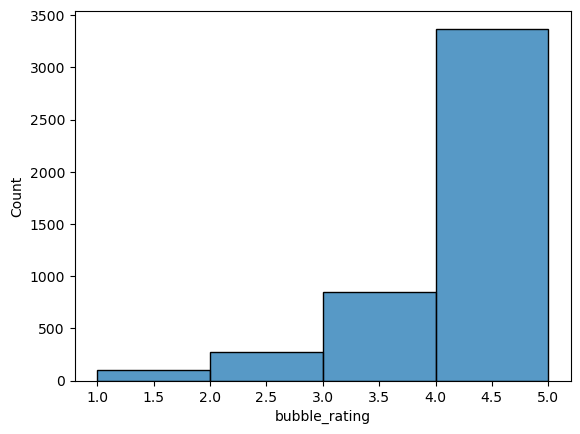

In [7]:
sns.histplot(data=df1, x='bubble_rating', binwidth=1)


# Clean the data if necessary 



## NaN value detection

In [8]:
df1.isna().sum().sum()

5271

In [9]:
#Drop NaN values
df1 = df1.dropna()


## Null value detection


In [10]:
df1.isnull().sum().sum()

0

## Duplicate value detection

In [11]:
df1.duplicated().sum().sum()

0

## Drop unnecessary column

In [12]:
df1 = df1.drop(columns=['Unnamed: 0','hotel_url'])
df1

,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class,class_4_5,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,3,0,...,0,0,0,0,0,0,0,1,1,0
1,Hotel Artemide,88,1,4.798118,5.0,1,0,0,4,1,...,1,1,0,0,0,0,0,1,0,0
2,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,4,1,...,1,1,0,0,0,0,0,1,1,0
4,The Guardian,0,0,4.624299,4.5,1,0,0,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,Amo Roma,0,0,1.000000,1.0,0,0,1,no stars,0,...,0,0,0,0,0,0,0,0,1,0
3836,Hotel Center 1,0,0,2.265918,2.5,1,0,0,2,0,...,0,0,0,0,0,0,0,1,1,0
3841,Roma Palace Inn,0,0,1.250000,1.5,0,0,1,no stars,0,...,0,0,0,0,0,0,0,0,0,0
3843,Belvedere Termini,0,0,2.236842,2.0,0,1,0,no stars,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Convert object features into digit features by using an encoder


In [13]:
#Identify Categorical variables to encode
print(list(set(df1.columns) - set(df1._get_numeric_data().columns)))

['name', 'class']


In [14]:
enc = OrdinalEncoder()
dfTransformed = df1.drop(columns=['class','name'])

In [15]:
#Encode class
dfC = df1['bubble_rating'].copy().to_frame()
dfC['class'] = enc.fit_transform(df1[['class']])
dfTransformed = dfTransformed.join(dfC['class'])

In [16]:
#Encode name
dfN = df1['bubble_rating'].copy().to_frame()
dfN['name'] = enc.fit_transform(df1[['name']])
dfTransformed = dfTransformed.join(dfN['name'])

## 3. Study the correlation between the features.

In [17]:
dfTransformed.corr()

,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,...,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes,class,name
views,1.000000,0.613477,0.061523,0.062843,0.274596,-0.195069,-0.066673,0.219322,0.170822,0.598888,...,NaN,-0.006332,NaN,0.013643,0.004460,0.084653,-0.004544,0.020774,-0.057378,0.013856
views_binary,0.613477,1.000000,0.061246,0.059647,0.427241,-0.308143,-0.097413,0.318903,0.272679,0.571934,...,NaN,-0.010322,NaN,0.035662,0.033917,0.127315,0.026512,0.036005,-0.090393,0.039475
score_adjusted,0.061523,0.061246,1.000000,0.980330,-0.153424,0.188581,-0.071290,0.008201,0.004560,0.026534,...,NaN,0.025168,NaN,0.011600,0.014668,0.208670,0.044983,0.022165,0.084613,0.007843
bubble_rating,0.062843,0.059647,0.980330,1.000000,-0.153951,0.187525,-0.069211,-0.002976,-0.008802,0.017366,...,NaN,0.024489,NaN,0.012779,0.016392,0.199704,0.044530,0.015929,0.085758,0.008139
category_hotel,0.274596,0.427241,-0.153424,-0.153951,1.000000,-0.704397,-0.250972,0.425641,0.471442,0.574317,...,NaN,-0.021449,NaN,0.059188,0.042459,0.239202,0.046358,-0.021449,-0.319895,-0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amenities_Wifi,0.084653,0.127315,0.208670,0.199704,0.239202,-0.004660,-0.283459,0.185114,0.312341,0.238863,...,NaN,-0.035386,NaN,0.019983,0.026195,1.000000,0.110305,-0.007242,-0.361557,-0.053781
amenities_Wine / champagne,-0.004544,0.026512,0.044983,0.044530,0.046358,0.018300,-0.081123,0.058240,0.076245,0.037794,...,NaN,0.026486,NaN,0.068574,0.019244,0.110305,1.000000,0.026486,-0.046492,-0.005574
amenities_Yoga classes,0.020774,0.036005,0.022165,0.015929,-0.021449,0.005763,0.018129,-0.016736,-0.007000,0.029529,...,NaN,-0.001328,NaN,-0.002303,0.137479,-0.007242,0.026486,1.000000,0.013955,0.041113
class,-0.057378,-0.090393,0.084613,0.085758,-0.319895,0.158305,0.171693,-0.016902,-0.457393,-0.198310,...,NaN,-0.001206,NaN,0.019820,-0.024177,-0.361557,-0.046492,0.013955,1.000000,0.007584


# Analysis Correlation

In [18]:
# sort columns based on correlation with column bubble_rating
corr_matrix_sorted = dfTransformed.corr().sort_values(by='bubble_rating', ascending=False,axis = 1)
corr_matrix_sorted

,bubble_rating,score_adjusted,award_cert_excellence,price_min,amenities_Airport transportation,amenities_Free internet,price_curr_min,amenities_Internet,amenities_Wifi,category_inn,...,amenities_Electric blanket,amenities_Fence around pool,amenities_hotel_amenity_free_breakfast,amenities_hotel_amenity_free_internet,amenities_hotel_amenity_internet,amenities_hotel_amenity_wifi,amenities_Kids pool,amenities_Saltwater pool,amenities_Water park,amenities_Waterslide
views,0.062843,0.061523,0.251408,0.197473,0.090029,0.064682,0.146111,0.069927,0.084653,-0.195069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_binary,0.059647,0.061246,0.368185,0.268773,0.102062,0.088522,0.223312,0.100565,0.127315,-0.308143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_adjusted,0.980330,1.000000,0.263876,0.258746,0.224345,0.228297,0.221144,0.214499,0.208670,0.188581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bubble_rating,1.000000,0.980330,0.257476,0.250780,0.222909,0.215548,0.211360,0.203102,0.199704,0.187525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_hotel,-0.153951,-0.153424,0.303727,0.234245,0.010814,0.181633,0.172169,0.231637,0.239202,-0.704397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amenities_Wifi,0.199704,0.208670,0.270897,0.105911,0.211247,0.742843,0.080762,0.795585,1.000000,-0.004660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities_Wine / champagne,0.044530,0.044983,0.100253,0.051808,0.128903,0.112237,0.036768,0.111066,0.110305,0.018300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities_Yoga classes,0.015929,0.022165,0.007831,-0.010038,0.009214,-0.013623,-0.007830,-0.013838,-0.007242,0.005763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,0.085758,0.084613,-0.203063,0.026358,-0.052896,-0.336613,0.028275,-0.361645,-0.361557,0.158305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Decide to select the features: views, score_adjusted as they produce a significant correlation 

In [19]:
dfTransformed[['bubble_rating','views']].corr()

,bubble_rating,views
bubble_rating,1.000000,0.062843
views,0.062843,1.000000


In [20]:
dfTransformed[['bubble_rating','score_adjusted']].corr()

,bubble_rating,score_adjusted
bubble_rating,1.00000,0.98033
score_adjusted,0.98033,1.00000


# Analysis

Based on the correlation above, we can sort from least correlation to most correlation is views, score_adjusted. The correlation is postive which indicates a postive correlation from all variables with rating. This suggest that the higher the rating, the higher the variables.

## 4. Split the dataset and train a Linear regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.

In [21]:
#Train 20% size of the dataset 
train, test = train_test_split(dfTransformed, train_size=0.2, random_state=142)
print(train.shape)
print(test.shape)


(452, 270)
(1810, 270)


In [22]:
# Getting input data and targets for building prediction model
Xtrain = train[['views','score_adjusted']]
ytrain = train['bubble_rating']

Xtest = test[['views','score_adjusted']]
Ytest = test['bubble_rating']

print("Xtrain shape: ", Xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("Xtest shape: ", Xtest.shape)
print("Ytest shape: ", Ytest.shape)
print(Xtrain.head())
print(ytrain.head())

Xtrain shape:  (452, 2)
ytrain shape:  (452,)
Xtest shape:  (1810, 2)
Ytest shape:  (1810,)
      views  score_adjusted
1662      0        4.333333
579       0        4.314465
67        9        4.796358
2537      0        4.600000
1431      0        4.146479
1662    4.5
579     4.5
67      5.0
2537    4.5
1431    4.0
Name: bubble_rating, dtype: float64


In [23]:
# Training Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(Xtrain, ytrain)
print("y = x *", reg.coef_, "+", reg.intercept_)


y = x * [-0.00243348  0.99192778] + 0.04494502551939128


## Evaluate Models

In [24]:
predicted= reg.predict(Xtest)
# #MSE
mse = mean_squared_error(Ytest,predicted) 
print("MSE:", mse)
print("Root MSE", np.sqrt(mse))


MSE: 0.020144644886851987
Root MSE 0.14193183183081937


## Feature Selection

In [25]:
import itertools 

rfe = RFE(estimator=reg, n_features_to_select=1, step=1)
rfe.fit(train.drop(['bubble_rating'], axis=1),  train['bubble_rating'])
for i,a in zip(range(train.drop(['bubble_rating'], axis=1).shape[1]), list(dfTransformed.columns)):
    print(a,end =" ")
    print('Rank: %.3f' % (rfe.ranking_[i]))


views Rank: 177.000
views_binary Rank: 125.000
score_adjusted Rank: 1.000
bubble_rating Rank: 42.000
category_hotel Rank: 43.000
category_inn Rank: 38.000
category_specialty Rank: 108.000
class_4_5 Rank: 203.000
class_3_4_5 Rank: 219.000
n_reviews Rank: 208.000
location_grade Rank: 120.000
discount Rank: 213.000
discount_perc Rank: 223.000
price_curr_min Rank: 222.000
price_min Rank: 224.000
price_max Rank: 45.000
award_travellers_choice Rank: 132.000
award_greenleaders Rank: 168.000
award_cert_excellence Rank: 220.000
photos Rank: 124.000
amenities_24-hour check-in Rank: 161.000
amenities_24-hour front desk Rank: 107.000
amenities_24-hour security Rank: 122.000
amenities_Additional bathroom Rank: 26.000
amenities_Adults only Rank: 225.000
amenities_Aerobics Rank: 98.000
amenities_Air conditioning Rank: 30.000
amenities_Air purifier Rank: 172.000
amenities_Airport transportation Rank: 173.000
amenities_Allergy-free room Rank: 238.000
amenities_amenity_free_internet_title_ad3 Rank: 57.0

In [26]:
#MSE prediction on different number of features
mses= []
for i in range(1,10):
    rfe = RFE(estimator=reg, n_features_to_select=i)
    # training model
    rfe.fit(Xtrain, ytrain)
    # predicting on test set
    ypred = rfe.predict(Xtest)
    mse = mean_squared_error(Ytest,predicted) 
    # print this
    print("MSE on test set using", i, "features: ", mse)
    # append to the list
    mses.append(mse)

MSE on test set using 1 features:  0.020144644886851987
MSE on test set using 2 features:  0.020144644886851987
MSE on test set using 3 features:  0.020144644886851987
MSE on test set using 4 features:  0.020144644886851987
MSE on test set using 5 features:  0.020144644886851987
MSE on test set using 6 features:  0.020144644886851987
MSE on test set using 7 features:  0.020144644886851987
MSE on test set using 8 features:  0.020144644886851987
MSE on test set using 9 features:  0.020144644886851987


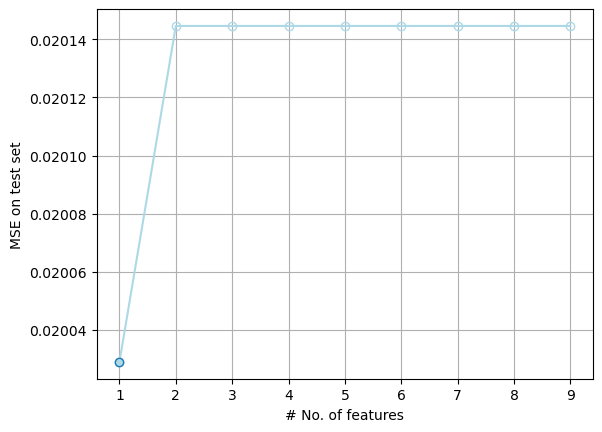

In [27]:
# Estimating mse on test set using RFE by using different number of features
estimator = reg
mses= []
for i in range(1, 10):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(Xtrain, ytrain)
    supp = selector.get_support()

    predicted = selector.predict(Xtest)
    mse = mean_squared_error(Ytest,predicted) 
    mses.append(mse)
    
best = 1
for item in mses:
    if item < mses[best - 1]:
        best = mses.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('MSE on test set')
plt.plot(range(1, 10), mses, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, mses[best-1], marker = 'o', markerfacecolor = 'lightblue')

# Explaination
Based on the summary of all feature, we can see that score_adjusted has the highest ranking. 

To further verify our assumption, the accuracy score on test set using RFE graph suggest that the mse is lowest when having 1 feature. 

Therefore, it is highly plausible that selecting one feature will give the best model.


## 5. Split the dataset and train a KNN model to predict 'rating' based on other features. 

In [28]:
# Training KNN model
clf = KNeighborsRegressor(n_neighbors = 4)
clf.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=4)

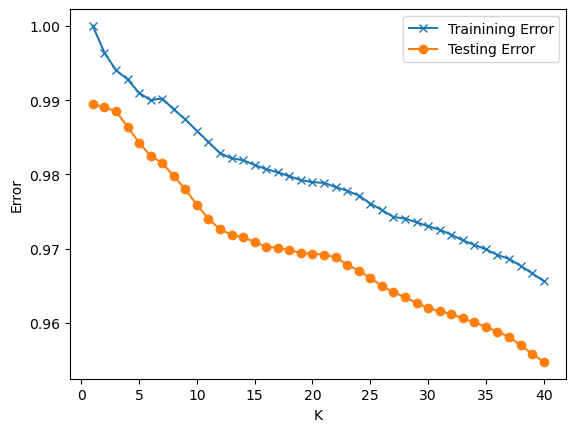

In [29]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsRegressor(n_neighbors = i)
    clf.fit(Xtrain, ytrain)
    training_error.append(1.0-mean_squared_error(clf.predict(Xtrain), ytrain))
    testing_error.append(1.0-mean_squared_error(clf.predict(Xtest), Ytest))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [30]:
# Create a KNN regressor model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsRegressor(n_neighbors = 10)
scores = cross_val_score(clf, Xtrain, ytrain, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.96355844 0.96062005 0.91061047 0.96118115 0.95306813 0.95601682
 0.99444444 0.97170051 0.98348175 0.9377572 ]
Average accuracy: 0.9592 +- 0.0221


## 6. Tune the hyper-parameter K in KNN to see how it influences the prediction performance

In [31]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsRegressor()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='neg_mean_squared_error', cv=10)
clf.fit(Xtrain, ytrain)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('MSE: ', -clf.best_score_)

Best K value:  2
MSE:  0.01185990338164251


## Analysis

In [32]:
print('The best K value is', clf.best_params_['n_neighbors'], "and produce a MSE of" , -clf.best_score_)
print('In comparison, the model has considerably improved from before tuning %.4f +- %.4f'%  (scores.mean(), scores.std()))

The best K value is 2 and produce a MSE of 0.01185990338164251
In comparison, the model has considerably improved from before tuning 0.9592 +- 0.0221


## Polynomial Regression

In [33]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

# Fit the model with degree 2 
poly = PolynomialFeatures(degree=2)
Xtrain_poly = poly.fit_transform(Xtrain)
 
# Training Linear Regression model
poly.fit(Xtrain_poly, ytrain)
lin2 = linear_model.LinearRegression()
lin2.fit(Xtrain_poly, ytrain)

LinearRegression()

## Evaluate Model

In [34]:

Xtest_poly =poly.fit_transform(Xtest)
predicted_poly= lin2.predict(Xtest_poly)

# #MSE
mse_poly = mean_squared_error(Ytest,predicted_poly) 

print("MSE:", mse_poly)
print("Root MSE", np.sqrt(mse))



MSE: 0.020793726583025366
Root MSE 0.14193183183081937


In [35]:
mse_scores = []
rmse_scores = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:

    # Create the polynomial regression model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(Xtrain)
    X_test_poly = poly.transform(Xtest)

    # Fit the model
    model = linear_model.LinearRegression()
    model.fit(X_train_poly, ytrain)

    # Predict the values on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate the MSE and RMSE scores
    mse = np.mean((y_pred - Ytest)**2)
    rmse = np.sqrt(mse)

    # Append the scores to the lists
    mse_scores.append(mse)
    rmse_scores.append(rmse)

In [36]:
for index,degree in zip(degrees,list(mse_scores)):
    print("Number of degree:",index, "and" ,"mse", degree)

Number of degree: 1 and mse 0.02014464488685199
Number of degree: 2 and mse 0.020793726583025366
Number of degree: 3 and mse 0.036530662549449575
Number of degree: 4 and mse 26.235571072128245
Number of degree: 5 and mse 830.8363195957121


## Analysis

As the number of degree increases, the worse the model becomes. The testing degree is 2 which doesn't give a fit as testing degree 1. This means linear regression is better than polynomial regression.

## Bayesian Ridge Regression 

In [37]:
from sklearn.linear_model import BayesianRidge

# Create a BayesianRidge model
brr = linear_model.BayesianRidge()

# Fit the model to the data
brr.fit(Xtrain, ytrain)

BayesianRidge()

## Evaluate Model

In [38]:
ypred = brr.predict(Xtest)
mse_bayRidge = mean_squared_error(Ytest, ypred)
print("MSE" , mse_bayRidge)

MSE 0.020147201749234046


## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(Xtrain, ytrain)


DecisionTreeRegressor()

## Evaluate 

In [40]:
ypred_dtr = dtr.predict(Xtest)
mse_dtr = mean_squared_error(Ytest, ypred_dtr)
print("MSE" , mse_dtr)

MSE 0.0008287292817679558


# Comparison

(0.0, 0.022)

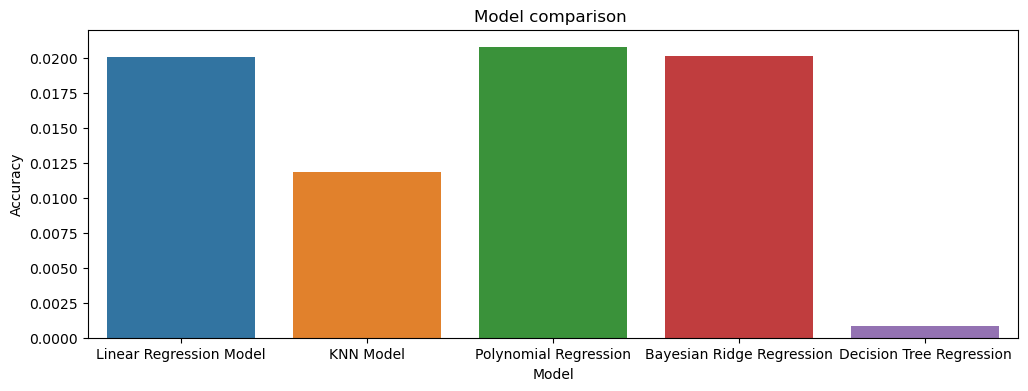

In [41]:
plt.figure(figsize=(12,4))
barplot = sns.barplot(x=['Linear Regression Model','KNN Model','Polynomial Regression','Bayesian Ridge Regression','Decision Tree Regression'],
            y=[np.min(mses),-clf.best_score_,mse_poly,mse_bayRidge,mse_dtr])
barplot.set(title = "Model comparison ", xlabel = "Model", ylabel ="Accuracy")
plt.ylim(0, 0.022)

Based on the MSE of the 5 models, we can see that Decision Tree Regression Model gives a significant more accurate result than all the other Regression Model with views, score_adjusted.

The graphical visualzation of the 5 models also confirms the aformentioned statement.

In [42]:
print("Linear Regression Model MSE:",np.min(mses))
print("KNN Model MSE:",-clf.best_score_)
print("Polynomial Regression Model MSE:",mse_poly)
print("Bayesian Ridge Regression Model MSE:",mse_bayRidge)
print("Decision Tree Regression Model MSE:",mse_dtr)


Linear Regression Model MSE: 0.0200289554708181
KNN Model MSE: 0.01185990338164251
Polynomial Regression Model MSE: 0.020793726583025366
Bayesian Ridge Regression Model MSE: 0.020147201749234046
Decision Tree Regression Model MSE: 0.0008287292817679558
